# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
sns.set(color_codes=True)

# Read the Data as a Dataframe

In [2]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Here our Target variable(Personal Loan) is in middle of the dataframe so for our convenient to drop the personal loan column
from original place and add to last of the dataframe.

In [3]:
personal_loan=data['Personal Loan']
data.drop(['Personal Loan'],axis=1,inplace=True)
data['Personal Loan']=personal_loan
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


Now the Target variable is added at the end of the dataframe.

# Read the column description and understand each attribute well

From the above Dataframe,we have 14 attributes and in these attributes one (Personal Loan)is Target variable and 
other is independent variable.

Here,ID variable can be ignored.Customer id is only for maintaining the record in serial number.
No relationship with ID and Loan.

ZIP Code - Home address ZIP Code will not any effect on our model.

Family - Number of family member of the customer.

Education - In above dataset education level from 1 to 3 which are Undergrad ,Graduate and Advanced/Professional.

Age - Age of the customer

Experience - Years of professional experience

Income - Annual income of the customer($000) 

CCAvg - Avg.spending on credit cards per month($000)

Mortgage - Value of House Mortgage($000)


Here, CD Account,Securities Account,Online,Credit Card and Personal Loan are Binary Categorical Variables.

CD Account - Does the customer have CD Account with bank or not?

Security Account - Does the customer have Security Account with bank or not?

Online - Does the cutomer have online facilities with bank or not?

Credit Card - Does the customer have Credit Card or not?

Personal Loan - This is our Traget variable which we have to predict.This shows that the customer has taken loan or not?

# shape of the Data

In [4]:
data.shape

(5000, 14)

There are 5000 rows and 14 columns in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data has 5000 instances with 14 attributes,1 float type and 13 integer type.

In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

There are no null values in any of the column.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [8]:
data[data['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [9]:
data[data<0]=0
data[data['Experience']<0]['Experience'].count()

0

Now we can see that negative values count is Zero means there is no negative value in the dataframe.

In [10]:
data.Experience.describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Now we can see minimum value of Experience is Zero(0),which was -3 earlier.

# Study the data distribution in each attribute,share your findings.

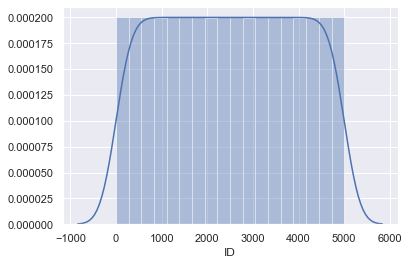

In [11]:
sns.distplot(data['ID'])

The above plot is Uniform distribution.

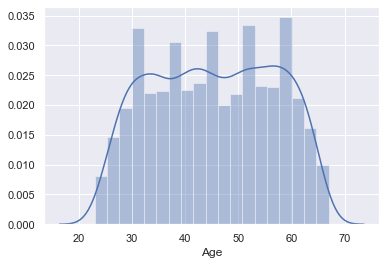

In [12]:
sns.distplot(data['Age'])

Plot of Age is normally distributed.

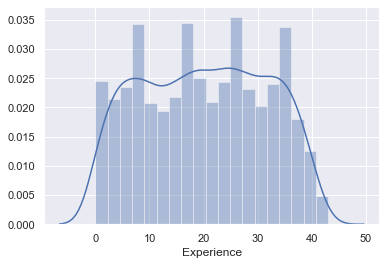

In [13]:
sns.distplot(data['Experience'])

Experience is also normally distributed.

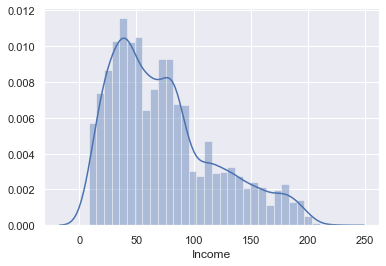

In [14]:
sns.distplot(data['Income'])

Distribution of Income is right skewed because tail goes to the right.

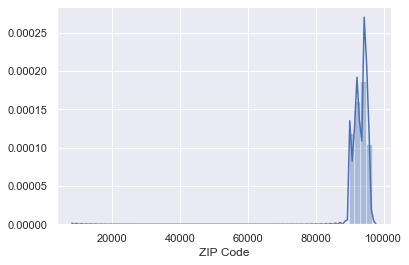

In [15]:
sns.distplot(data['ZIP Code'])

The above distribution is left skewed distribution because the tail goes to the left.

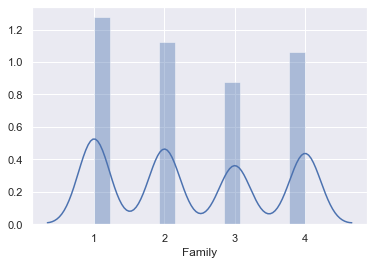

In [16]:
sns.distplot(data['Family'])

The above distribution is uniformally distributed.Data points are more with family  1 and 2.

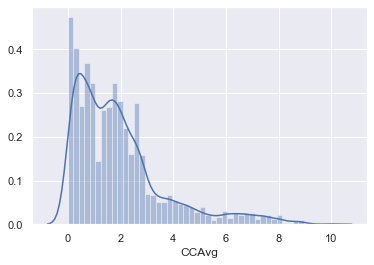

In [17]:
sns.distplot(data['CCAvg'])

The above distribution is right skewed because the tail goes to right.
Most of the customers having avg. monthly spending on credit cards between $1k  to  $2.5k. Here,we have very few customers whose avg. monthly spending on 
creditcard is more than $8k.

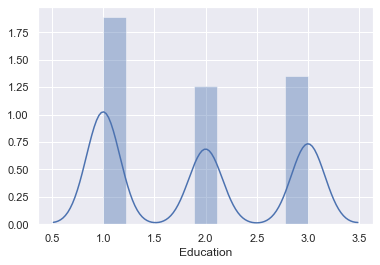

In [18]:
sns.distplot(data['Education'])

Here Undergrad level customers are more than the Graduate and Advanced/Professional customers.

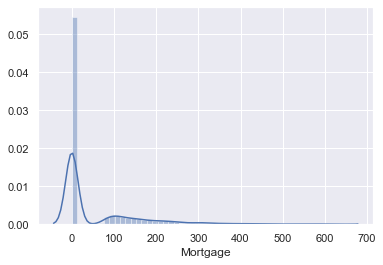

In [19]:
sns.distplot(data['Mortgage'])

The above distribution is right skewed distribution because the tail goes to right.

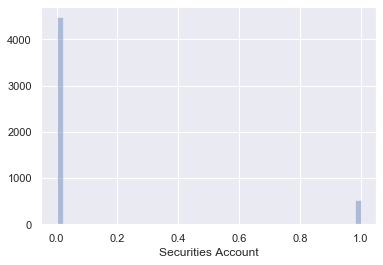

In [20]:
sns.distplot(data['Securities Account'],kde=False)

The above plot is Bernoulli Distribution which signifies that most of the customers have no security account with bank.
It also shows that a very few customers have security account.

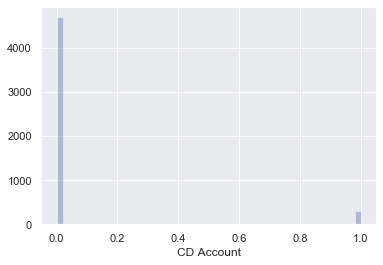

In [21]:
sns.distplot(data['CD Account'],kde=False)

This is also a Benoulli Distribution.
From the plot its analysed that most of the customers donot have CD account and very few customers are having CD account. 

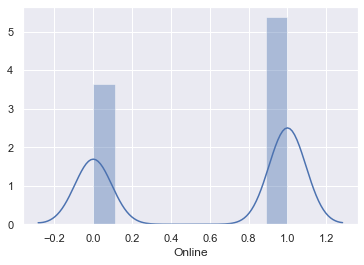

In [22]:
sns.distplot(data['Online'])

Above plot is Bernoulli Distribution.Number of customers who have online facilities is greater than the number of customers
who do not have .

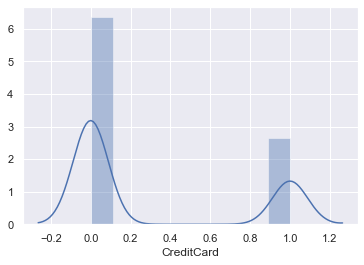

In [23]:
sns.distplot(data['CreditCard'])

The above plot is Benoulli Distribution.
From the above plot its analysed that number of customers without credit card is almost double than the number of customers with 
credit card.

# Target Column Distribution,with Comments

In [24]:
loan_counts=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
loan_counts.columns=['Labels','Personal Loan']
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


Here out of 5000 data point:
4520 are labeled as Zero(0) signifies that customer did not take Loan.
whereas,480 as 1 signifies about the customer who took Loan.

In [25]:
n_true=len(data.loc[data['Personal Loan']==True])
n_false=len(data.loc[data['Personal Loan']==False])
print("Number of true cases : {0} ({1:2.2f}%)".format(n_true,(n_true/(n_true+n_false))*100))
print("Number of false cases : {0} ({1:2.2f}%)".format(n_false,(n_false/(n_true+n_false))*100))

Number of true cases : 480 (9.60%)
Number of false cases : 4520 (90.40%)


Here we have 9.60% customers who took personal loan and rest 90.40% didnot take personal loan.


Now the Target column distribution is plotted by using the Bar graph.

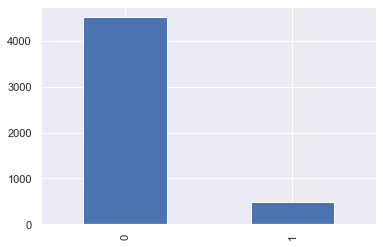

In [26]:
data['Personal Loan'].value_counts().plot(kind='bar')

From the above data we can analyse that 4520 customers have not accepted the personal loan and 480 customers have accepted the personal loan.


# Here we have not required ID and ZIP Code columns.so we dropped  these two.

In [27]:
data=data.drop(['ID','ZIP Code'],axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


# Split the data into training and test set in the ratio of 70:30 respectively.

In [28]:
X=data.drop('Personal Loan',axis=1)
y=data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


Lets check split of the data

In [29]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index))*100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index))*100))

70.00% data is in training set
30.00% data is in test set


In [30]:
print('X train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('X test data {}'.format(X_test.shape))
print('y test data {}'.format(y_test.shape))

X train data (3500, 11)
y train data (3500,)
X test data (1500, 11)
y test data (1500,)


# Classification by Logistic Regression Model

Fit the model on train

In [31]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)
#predict on test

y_predict=model.predict(X_test)

coef_data= pd.DataFrame(model.coef_)

coef_data['intercept']=model.intercept_

print(coef_data)

          0         1         2         3         4         5         6  \
0 -0.399775  0.399195  0.048907  0.644518  0.162338  1.640048  0.000788   

          7         8         9        10  intercept  
0 -0.860433  3.212828 -0.571611 -0.989473  -2.489081  


In [32]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model_score= model.score(X_test, y_test)
print(model_score)

0.946


In [34]:
model_accuracy_score= accuracy_score(y_test, y_predict)
print( model_accuracy_score)

0.946


In [35]:
# some other metrics

print(classification_report(y_test,y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.56      0.67       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



Here, Accuracy of accepting Loan : 0.95 , Precision of accepting Loan : 0.84 , Recall of accepting loan : 0.56,  F1-score of accepting loan: 0.67

# Confusion matrix

(<matplotlib.axes._subplots.AxesSubplot at 0x22c6d4b7b48>,)

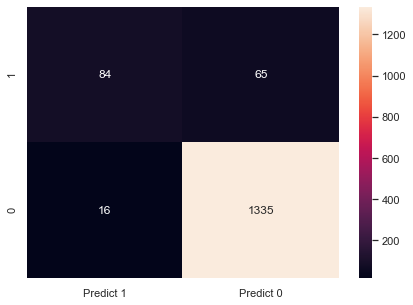

In [36]:
conf_mat = metrics.confusion_matrix(y_test,y_predict, labels=[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                             columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_conf_mat, annot=True, fmt='g'), 

###### From the above Confusion metrices we observe that-

True Positive = 84 , True Negative = 1335, False positive = 16, False Negative = 65

# We can improve the accuracy by standardization of the data

In [37]:
# import zscore for scaling the data
from  scipy.stats import zscore

In [38]:
# Apply zscore on independent variables
X_train1 = X_train.apply (zscore)
X_test1 = X_test.apply(zscore)

In [39]:
#fit the Logistic regression model on scaled data

model1 = LogisticRegression(random_state= 0)
model1.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model1.score(X_train1, y_train)

0.9531428571428572

In [41]:
model1.score(X_test1, y_test)

0.9473333333333334

In [42]:
model1.accuracy_score = accuracy_score(y_test, y_predict)
print(model1.accuracy_score)

0.946


In [43]:
y_predict1 = model1.predict(X_test1)

In [44]:
print(classification_report(y_test,y_predict1, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



After Scaling Logistic Regression we observe that

Accuracy of accepting loan : 0.95
    
    Precision of accepting loan: 0.83
        
        recall of accepting loan : 0.59 
            
            f1-score of accepting loan : 0.69

# After Scaling ,Confusion Matrix

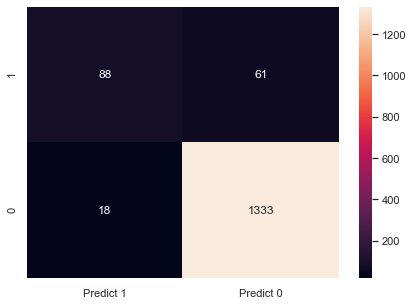

In [45]:
conf_mat= metrics.confusion_matrix(y_test, y_predict1, labels=[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(data_conf_mat, annot= True,fmt='g' )

From above Confusion Matrix-
True positive : we correctly predicted that they do accepting Loan (88) , True negative : we correctly predicted that they do not accepting loan(1333) , False positive: we incorrectly predicted that they do accepting loan(18)Type 1 error, False negative: we incorrectly that they do not accepting loan(61)Type 2 error

# K-NN Model

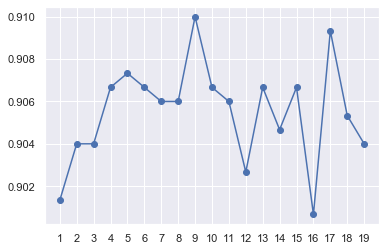

In [46]:
kscores= []
for i in range (1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    s= knn.score(X_test, y_test)
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-')
plt.xticks(range(1,20))
plt.show()

In [47]:
knn_model= KNeighborsClassifier(n_neighbors=3 ,weights= 'distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [48]:
knn_score= knn_model.score(X_test, y_test)
print(knn_score)

0.906


In [49]:
knn_y_predicted = knn_model.predict(X_test)

In [50]:
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
print(knn_accuracy)

0.906


In [51]:
print(classification_report(y_test,knn_y_predicted, digits=2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1351
           1       0.54      0.38      0.44       149

    accuracy                           0.91      1500
   macro avg       0.74      0.67      0.70      1500
weighted avg       0.89      0.91      0.90      1500



# Confusion Matrix of KNN-Model

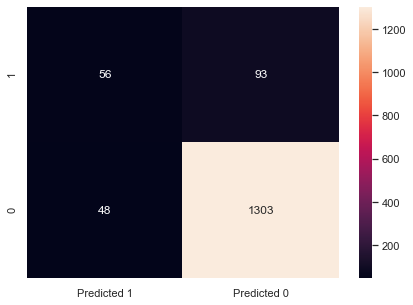

In [52]:
conf_mat= metrics.confusion_matrix(y_test,knn_y_predicted, labels=[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_conf_mat, annot= True, fmt='g')

# Improvement of the Model by standardization of the data

In [53]:
# import zscore for scaling the data
from scipy.stats import zscore

In [54]:
X_train1= X_train.apply(zscore)
X_test1= X_test.apply(zscore)

In [55]:
knn_model1 =KNeighborsClassifier(n_neighbors=3, weights= 'distance')
knn_model1.fit(X_train1, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [56]:
knn_model1.score(X_test1,y_test)

0.9553333333333334

In [57]:
knn_y_predicted1= knn_model1.predict(X_test1)

In [58]:
knn_model1.accuracy = accuracy_score(y_test, knn_y_predicted1)
print(knn_model1.accuracy)

0.9553333333333334


In [59]:
print(classification_report(y_test, knn_y_predicted1, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.62      0.73       149

    accuracy                           0.96      1500
   macro avg       0.93      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



Accuracy of accepting loan : 0.96
Precision of accepting loan : 0.90
recall of accepting loan : 0.62
f1-score of accepting loan : 0.73

# After scaling k-nn confusion matrix

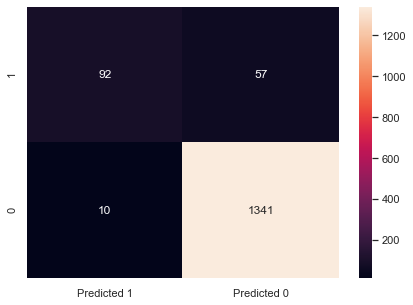

In [60]:
conf_mat= metrics.confusion_matrix(y_test, knn_y_predicted1, labels=[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index= [i for i in ["1","0"]],
                            columns= [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot=True, fmt='g')

After scaling k-nn confusion matrix:
    
    True positive : 92
    True negative : 1341
    False positive : 10
    False negative : 57

# Naive Bayes Model

In [61]:
#create the model
gnb_model= GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
gnb_y_predicted= gnb_model.predict(X_test)

In [63]:
gnb_score= gnb_model.score(X_test,y_test)
print(gnb_score)

0.8746666666666667


In [64]:
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
print(gnb_accuracy)

0.8746666666666667


# Confusion matrix of Naive Bayes Model

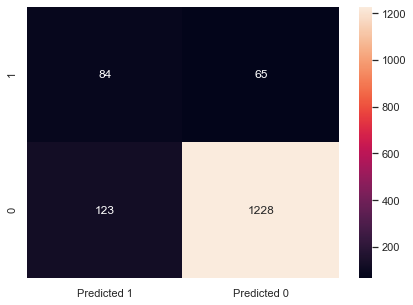

In [65]:
conf_mat = metrics.confusion_matrix(y_test, gnb_y_predicted, labels=[1,0])


data_conf_mat = pd.DataFrame(conf_mat, index = [i for i in ["1","0"]],
                            columns = [i for i in ["Predicted 1", "Predicted 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot= True, fmt='g')



# For better result, standardization of the data

In [66]:
# import zscore for scaling the data
from scipy.stats import zscore

In [67]:
X_train1 = X_train.apply(zscore)
X_test1 = X_test.apply(zscore)

In [68]:
gnb_model1 = GaussianNB()
gnb_model1.fit(X_train1, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
gnb_y_predicted1 = gnb_model1.predict(X_test1)

In [70]:
gnb_model1_score= gnb_model1.score(X_test1, y_test)
print(gnb_model1_score)

0.8713333333333333


In [71]:
gnb_model1_accuracy = accuracy_score(y_test, gnb_y_predicted1)
print(gnb_model1_accuracy)

0.8713333333333333


In [72]:
print(classification_report(y_test, gnb_y_predicted1 , digits=2))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



From classification report ,we have :
    Accuracy of accepting loan : 0.87
    precision of accepting loan : 0.40
    recall of accepting loan : 0.56
    f1-score of accepting loan : 0.47

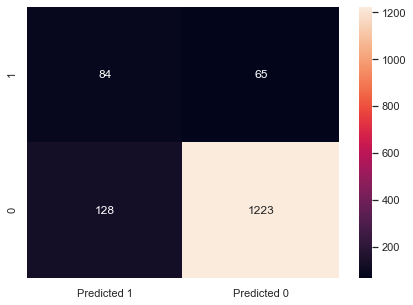

In [73]:
conf_mat = metrics.confusion_matrix(y_test, gnb_y_predicted1, labels= [1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[ i for i in["1","0"]],
                            columns= [i for i in ["Predicted 1","Predicted 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot=True, fmt='g')

After scaling Naive Bayes confusion matrix, we have :
    True positive : 84
        True nagative : 1223
            False positive : 128
                 False negative : 65

# COMPARISON OF THREE MODELS 

In [74]:
print('Overall Model Accuracy After scaling:\n')
print('Logistic Regression : {0:.0f}%'. format(model1.accuracy_score * 100))
print('K-Nearest Neighbors : {0:.0f}%'. format(knn_model1.accuracy *100))
print('Naive Bayes         : {0:.0f}%'.format(gnb_model1_accuracy * 100))

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%


By Logistic Regression ,with 95% accuracy the customer buying Personal loan.
By K-Nearest Neighbors ,with 96% accuracy the customer buying Personal loan.
By Naive Bayes,         with 87 % accuracy the customer buying Personal loan.

# Overall Model Confusion matrix after scaling

# Logistic Regression

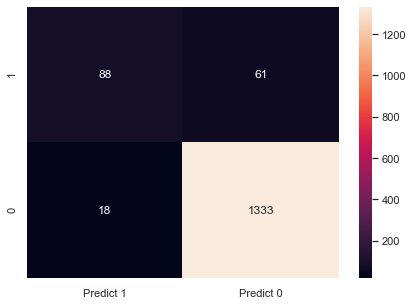

In [75]:
conf_mat = metrics.confusion_matrix(y_test, y_predict1, labels =[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot= True, fmt= 'g')

From above confusion matrix,  True positive : 88 , True negative : 1333,  False positive : 18, False negative : 61

# K-Nearest Neighbors

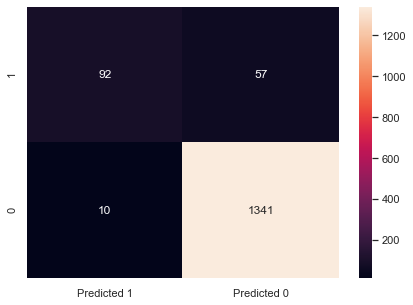

In [76]:
conf_mat= metrics.confusion_matrix(y_test, knn_y_predicted1, labels=[1,0])

data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in["1","0"]],
                            columns=[i for i in ["Predicted 1", "Predicted 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot= True, fmt='g')

From above confusion matrix we have , True positive = 92 , True negative = 1341 ,  False positive = 10 , False negative = 57

# Naive Bayes

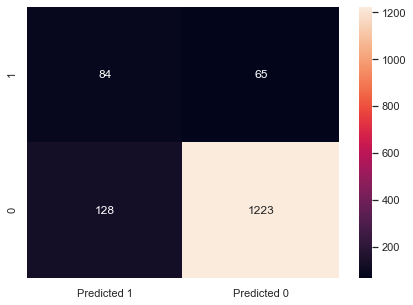

In [77]:
conf_mat= metrics.confusion_matrix(y_test, gnb_y_predicted1, labels=[1,0])

data_conf_mat= pd.DataFrame(conf_mat, index= [i for i in ["1","0"]],
                           columns= [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(data_conf_mat, annot= True, fmt='g')

From the above confusion matrix we have,  True positive : 84 ,  True negative : 1223 ,  False positive : 128 ,  False negative : 65

# ROC Curve for all the Models

# Logistic Regression

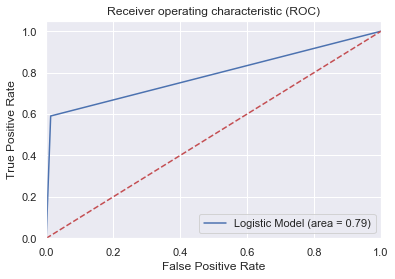

In [78]:
logistic_fpr, logistic_tpr ,logistic_threshold = metrics.roc_curve(y_test,y_predict1)
logistic_roc_auc = metrics.roc_auc_score(y_test, y_predict1)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The area in ROC curve for Logistic Regressionn is 0.79

# K-Nearest Neighbors 

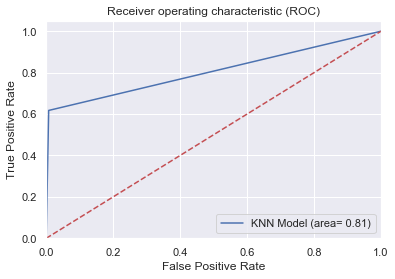

In [79]:
knn_fpr , knn_tpr, knn_threshold = metrics.roc_curve(y_test,knn_y_predicted1)
knn_roc_auc = metrics.roc_auc_score(y_test, knn_y_predicted1)
plt.plot(knn_fpr, knn_tpr, label= 'KNN Model (area= %0.2f)'% knn_roc_auc)
plt.plot([0,1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc= "lower right")
plt.show()

The area in ROC curve for KNN MODEL is 0.81

# Naive Bayes

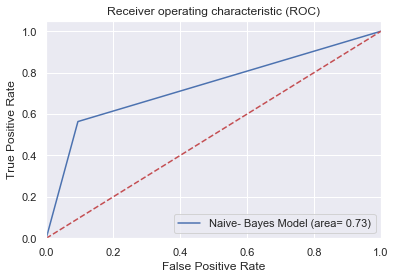

In [80]:
nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, gnb_y_predicted1)
nb_roc_auc= metrics.roc_auc_score(y_test, gnb_y_predicted1)
plt.plot(nb_fpr, nb_tpr, label= 'Naive- Bayes Model (area= %0.2f)'% nb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc= 'lower right')
plt.show()

The area in ROC Curve for Naive Bayes Model is 0.73

# Give your reasoning on which is the best model in this case and why it performs better ?

From the above analysed data, 

we found that K-Nearest Neighbors Model gives us the best accuracy which is 96%.

and from Confusion Matrix , we found that False positive (Type 1) error and False negative (Type 2) error are least in KNN Model.

The area in ROC Curve for K-NN is 0.81 which is close to 1 which means that K-NN Model is the best model in comparision to 
Logistic Model and Naive-Bayes Model whose ROC Area is 0.79 and 0.73 respectively.

Therefore,  from all the three Models , K-Nearest Neighbors Model is the best model to predict the customers who will accept 
the Personal Loan.